# **Recurrent Neural Network**

# **Part-1 :  Data Preprocessing**

**Importing the libraries**

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

**Importing the training_set**

In [79]:
df = pd.read_csv('Google_Stock_Price_Train.csv')
df

,Date,Open,High,Low,Close,Volume
0,01-03-2012,325.25,332.83,324.97,663.59,"73,80,500"
1,01-04-2012,331.27,333.87,329.08,666.45,"57,49,400"
2,01-05-2012,329.83,330.75,326.89,657.21,"65,90,300"
3,01-06-2012,328.34,328.77,323.68,648.24,"54,05,900"
4,01-09-2012,322.04,322.29,309.46,620.76,"1,16,88,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"6,23,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"7,89,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"11,53,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"7,44,300"


In [81]:
df = df.drop(columns = {'Open','High','Low', 'Volume'})

In [83]:
df

,Date,Close
0,01-03-2012,663.59
1,01-04-2012,666.45
2,01-05-2012,657.21
3,01-06-2012,648.24
4,01-09-2012,620.76
...,...,...
1253,12/23/2016,789.91
1254,12/27/2016,791.55
1255,12/28/2016,785.05
1256,12/29/2016,782.79


In [85]:
df.shape

(1258, 2)

In [87]:
df.dtypes

Date     object
Close    object
dtype: object

In [89]:
print(df['Date'].unique().tolist())

['01-03-2012', '01-04-2012', '01-05-2012', '01-06-2012', '01-09-2012', '01-10-2012', '01-11-2012', '01-12-2012', '1/13/2012', '1/17/2012', '1/18/2012', '1/19/2012', '1/20/2012', '1/23/2012', '1/24/2012', '1/25/2012', '1/26/2012', '1/27/2012', '1/30/2012', '1/31/2012', '02-01-2012', '02-02-2012', '02-03-2012', '02-06-2012', '02-07-2012', '02-08-2012', '02-09-2012', '02-10-2012', '2/13/2012', '2/14/2012', '2/15/2012', '2/16/2012', '2/17/2012', '2/21/2012', '2/22/2012', '2/23/2012', '2/24/2012', '2/27/2012', '2/28/2012', '2/29/2012', '03-01-2012', '03-02-2012', '03-05-2012', '03-06-2012', '03-07-2012', '03-08-2012', '03-09-2012', '03-12-2012', '3/13/2012', '3/14/2012', '3/15/2012', '3/16/2012', '3/19/2012', '3/20/2012', '3/21/2012', '3/22/2012', '3/23/2012', '3/26/2012', '3/27/2012', '3/28/2012', '3/29/2012', '3/30/2012', '04-02-2012', '04-03-2012', '04-04-2012', '04-05-2012', '04-09-2012', '04-10-2012', '04-11-2012', '04-12-2012', '4/13/2012', '4/16/2012', '4/17/2012', '4/18/2012', '4/19

In [91]:
print(df['Close'].unique().tolist())

['663.59', '666.45', '657.21', '648.24', '620.76', '621.43', '624.25', '627.92', '623.28', '626.86', '631.18', '637.82', '584.39', '583.92', '579.34', '567.93', '566.54', '578.39', '576.11', '578.52', '579.24', '583.51', '594.7', '607.42', '605.11', '608.18', '609.79', '604.25', '610.52', '608.09', '603.9', '604.86', '602.98', '612.32', '606.28', '604.45', '608.23', '607.64', '616.7', '616.56', '620.7', '619.55', '612.57', '603.3', '605.14', '605.48', '598.61', '603.49', '616.09', '614.3', '619.43', '623.33', '632.24', '631.76', '638.23', '644.28', '640.83', '647.55', '645.25', '653.96', '646.63', '639.48', '645.15', '640.86', '633.41', '630.59', '629.11', '625.14', '634.22', '649.23', '622.89', '604.41', '607.9', '605.79', '597.66', '594.43', '595.96', '599.62', '608.05', '613.78', '613.3', '603.19', '602.78', '605.6', '609.35', '595.34', '605.89', '611.11', '607.48', '611.98', '603.57', '602.35', '609.44', '627.21', '621.34', '598.76', '612.43', '599.16', '607.79', '602.01', '589.91'

In [93]:
import re

list1=[]
for value in df['Close']:
    list1.append(re.sub(',','',value))
df['Close']=list1

In [95]:
list2=[]
for value in df['Date']:
    list2.append(re.sub('/','-',value))
df['Date']=list2

In [97]:
df['Close']=df['Close'].astype(float)

In [99]:
df.dtypes

Date      object
Close    float64
dtype: object

In [101]:
df['Date'] = pd.to_datetime(df['Date'])

In [103]:
df['Date']

0      2012-01-03
1      2012-01-04
2      2012-01-05
3      2012-01-06
4      2012-01-09
          ...    
1253   2016-12-23
1254   2016-12-27
1255   2016-12-28
1256   2016-12-29
1257   2016-12-30
Name: Date, Length: 1258, dtype: datetime64[ns]

In [105]:
dataset_train=df[['Close']].values
dataset_train

array([[663.59],
       [666.45],
       [657.21],
       ...,
       [785.05],
       [782.79],
       [771.82]])

**Feature Scaling**

In [108]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
dataset_train = mms.fit_transform(dataset_train)
dataset_train

array([[0.23757287],
       [0.24151427],
       [0.22878051],
       ...,
       [0.40495845],
       [0.40184391],
       [0.38672602]])

In [110]:
dataset_train.shape

(1258, 1)

**Creating a data structure with 60 timesteps and 1 output**

In [113]:
X_train=[]
y_train=[]

for i in range(100,1258):
    X_train.append(dataset_train[i-100:i,0])
    y_train.append(dataset_train[i,0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [115]:
y_train.shape

(1158,)

In [117]:
X_train.shape

(1158, 100)

**Reshaping**

In [120]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))

# **Part-2 : Build and training the RNN**

**Importing the Keras libraries and packages**

In [124]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

**Initialising the RNN**

In [127]:
regressor = Sequential()

**Adding the first LSTM layers and some dropout regualrisation**

In [132]:
regressor.add(LSTM(units=75, return_sequences = True, input_shape = (X_train.shape[1],1 )))
regressor.add(Dropout(0.2))

**Adding the second LSTM layers**

In [135]:
regressor.add(LSTM(units=75, return_sequences=True))
regressor.add(Dropout(0.2))

**Adding the third LSTM layers**

In [138]:
regressor.add(LSTM(units=75, return_sequences=True))
regressor.add(Dropout(0.2))

**Adding the Forth LSTM layers**

In [141]:
regressor.add(LSTM(units=75))
regressor.add(Dropout(0.2))

**Adding the Output layer**

In [144]:
regressor.add(Dense(units=1))

**Compiling the RNN**

In [147]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

**Fitting the RNN to the training set**

In [150]:
regressor.fit(X_train, y_train, epochs =100, batch_size= 32)

Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 9s 148ms/step - loss: 0.0525
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 151ms/step - loss: 0.0138
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 137ms/step - loss: 0.0098
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 136ms/step - loss: 0.0100
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 149ms/step - loss: 0.0064
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 140ms/step - loss: 0.0065
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 137ms/step - loss: 0.0068
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 138ms/step - loss: 0.0097
Epoch 9/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 135ms/step - loss: 0.0061
Epoch 10/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 137ms/step - loss: 0.0055
Epoch 11/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 136ms/step - loss: 0.0045
Epoch 12/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 140ms/step - loss: 0.0054
Epoch 13/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 150ms/step - loss: 0.0056
Epoch 14/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 146ms/step - loss: 0.0049
Epoch 15/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 

**Prediction**

In [152]:
ypred_train = regressor.predict(X_train)

37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step  


In [154]:
print(ypred_train.shape)

(1158, 1)


**Evaluating the RNN**

In [157]:
from sklearn.metrics import mean_squared_error
rmse_train= np.sqrt(mean_squared_error(y_train,ypred_train))
rmse_train

0.03035800710682286

# **Test Data**

In [160]:
df2 = pd.read_csv('Google_Stock_Price_Test.csv')
df2.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [162]:
df2= df2.drop(columns= {'Open','High','Low','Volume','Date'})

In [164]:
df2.head()

,Close
0,786.14
1,786.90
2,794.02
3,806.15
4,806.65


In [166]:
df2.dtypes

Close    float64
dtype: object

In [168]:
# dataset_total = pd.concat([df['Close'], df2['Close']], axis=0)
# inputs = dataset_total[len(dataset_total) - len(df2) - 100:].values
# inputs = inputs.reshape(-1,1)
# inputs = mms.fit_transform(inputs)

# X_test = []
# for value in range(100,80):
#     X_test.append(inputs[value-100:value,0])
# X_test = np.array(X_test)
# X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
# predicted_stock_price = regressor.predict(X_test)
# predicted_stock_price = mms.inverse_transform(predicted_stock_price)

In [170]:
dataset_total = pd.concat([df['Close'], df2['Close']], axis=0)
inputs = dataset_total[len(dataset_total) - len(df2) - 100:].values
inputs = inputs.reshape(-1, 1)
inputs = mms.fit_transform(inputs)

X_test = []
# Fix the range in the loop to iterate correctly
for value in range(100, len(inputs)):  # Iterate until the length of inputs
    X_test.append(inputs[value - 100:value, 0])

X_test = np.array(X_test)

# Ensure X_test has the correct shape before reshaping
if X_test.shape[0] > 0 and X_test.shape[1] > 0:
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
else:
    print("X_test is empty or has an incorrect shape.")

predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = mms.inverse_transform(predicted_stock_price)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


In [172]:
print(len(dataset_train))

1258


In [174]:
X_test.shape

(20, 100, 1)

In [176]:
if np.all(abs(rmse_train - predicted_stock_price) <= 0.05 * predicted_stock_price):
    print('Good Model')
else:
    print('bad model')

bad model


# **Visualising the results**

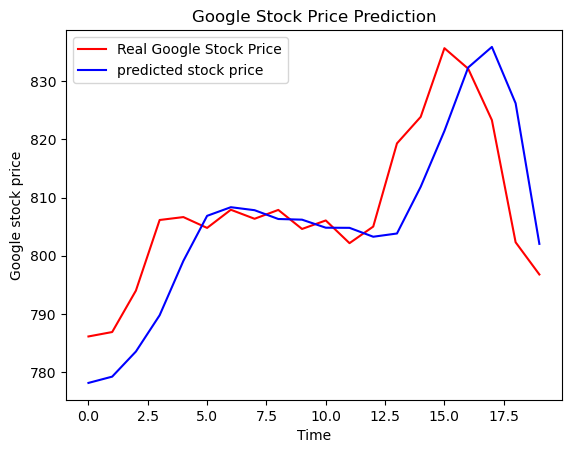

In [179]:
plt.plot(df2, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='predicted stock price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google stock price')
plt.legend()
plt.show()